<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.75;background-color:#00A693"><b>Telco Customer Churn Classification</b><br></h1>

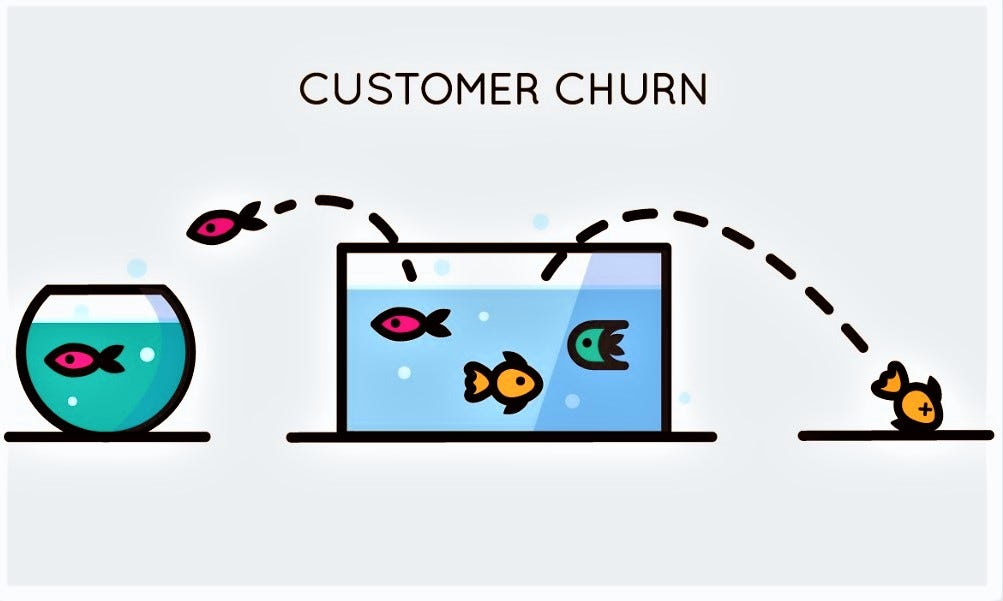

#  <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b> Import the Necessary Libraries and Dataset Info</b><br></h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format='{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('../input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.describe()

In [ ]:
sns.heatmap(data.isnull(), cmap='magma',cbar=False)

No null value in those dataset

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b> Encoding and Dividing Categorical feature , Numerical feature .</b><br></h1>

In [ ]:
l1=[len(i.split()) for i in data['TotalCharges']]
l2=[i for i in range(len(l1)) if l1[i] != 1]

print('Empty spaces index position:', *l2)

for i in l2:
    data.loc[i, 'TotalCharges']=data.loc[i-1,'TotalCharges']

data['TotalCharges']=data['TotalCharges'].astype(float)

data.drop(columns='customerID', inplace=True)

Convert TotalCharges string to float .

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1=data.copy(deep=True)
Text_data_feature=[i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')

for i in Text_data_feature:
    df1[i]=le.fit_transform(df1[i])
    print(i, ':', df1[i].unique(), '=', le.inverse_transform(df1[i].unique()))


In [ ]:
df1.head()

In [ ]:
colors = ['#E94B3C','#2D2926']

churn=df1[df1['Churn']==1].describe().T

not_churn = df1[df1['Churn']==0].describe().T




fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(5,5))

plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black',cbar=False,fmt='.2f')
plt.title('Churend Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black',cbar=False,fmt='.2f')
plt.title('Not Churend Customer')


fig.tight_layout(pad=0)

### Dividing numerical and categorical features

In [ ]:
cols=list(df1.columns)

categorical_features=[]
numerical_features=[]

for i in cols:
    if len(data[i].unique())>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        
print("Categorical Features:",*categorical_features)
print("Numrical Features:", *numerical_features)
    

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Exploratory Data Analysis</b><br></h1>

### Terget Variable visualization

In [ ]:
l=list(df1['Churn'].value_counts())
circle=[l[0]/sum(l)*100, l[1]/sum(l)*100]

fig=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90,explode=(0.1,0), colors=colors,
       wedgeprops={'edgecolor':'black', 'linewidth':1, 'antialiased': True})
plt.title('Churn Not-Churn %')

plt.subplot(1,2,2)
ax=sns.countplot(x='Churn', data=data, palette=colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');


- The dataset is **unbalanced** in a near about **3 : 1** ratio for **Not-Churn : Churn** customers!

In [ ]:
categorical_features.remove('Churn')

### Categorical Feature vs Terget Variable(Churn)

In [ ]:
fig = plt.subplots(nrows = 5,ncols = 3,figsize = (20,34))
for i in range(len(categorical_features[0:15])):
    plt.subplot(5,3,i+1)
    ax = sns.countplot(x=categorical_features[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs Churn'
    plt.title(title);
    
    
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3))

plt.subplot(1,1,1)
ax = sns.countplot(x=categorical_features[15],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = categorical_features[15] + ' vs Churn'
plt.title(title);




- Customer churning for **male** & **female** customers is very similar to each other!
- A high number of customers churn use of **Fiber optic** cables for providing the **InternetService**. On the contrary, from the above graph, customers prefer using **DSL** for their **InternetService**!
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

### Categorical Features vs Positive Target Variable (Churn Cases) :

In [ ]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes


phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check
    


In [ ]:
ax,fig = plt.subplots(nrows = 4,ncols = 4,figsize = (20,25))

plt.subplot(4,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}) #Etar Male, Femal hoyse encode onoshare, encode
#ja korse seta e hoyse.
#df1.MultipleLines.unique()
#data.MultipleLines.value_counts()
#Upore 2 ta command dile e bujte parbo kontar value ki

plt.title('Gender');

plt.subplot(4,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(4,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}) #
plt.title('Partner');

plt.subplot(4,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');


plt.subplot(4,4,5)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(4,4,6)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines'); #Etar value gula 'No','No Phone Service','Yes' asche encode je number diya korse seti diya


plt.subplot(4,4,7)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(4,4,8)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(4,4,9)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

plt.subplot(4,4,10)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(4,4,11)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(4,4,12)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(4,4,13)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

plt.subplot(4,4,14)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(4,4,15)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(4,4,16)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');


- **75%** of the churned customers are **not SeniorCitizen**! This is a major info that the company needs to divert it's attention towards!

- **PhoneService**, a high percentage of customers have switched!
- **PaperlessBilling** does not seemed to be appreciated by the customers!

### Numerical Features :

#### Distribution of Numerical Features :

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color=colors[0])
    title='Distribution : '+ numerical_features[i]
    plt.title(title)
plt.show()


### Numerical features vs Categorical features w.r.t Target variable (Churn) :

#### tenure vs Categorical Features :

In [ ]:
fig = plt.subplots(nrows=8, ncols=2, figsize=(20, 50))

for i in range(len(categorical_features)):
    plt.subplot(8,2,i+1)
    ax=sns.boxplot(x=categorical_features[i], y='tenure', data=data, hue='Churn', palette=colors)
    plt.title('tenure Vs ' + categorical_features[i])

- **Male** & **Female** customer churn graphs are very similar. 
- **SeniorCitizen** opted out from the services for a tenure values of **0 - 35** months. **20 - 35** months is the kind of decision making period about whether to continue or swtich for **SeniorCitizen**.

- PaperlessBilling, customers think of switching right from the 1st month.


#### MonthlyCharges vs Categorical Features :

In [ ]:
fig = plt.subplots(nrows=8, ncols=2, figsize=(20, 50))

for i in range(len(categorical_features)):
    plt.subplot(8,2,i+1)
    ax=sns.boxplot(x=categorical_features[i], y='MonthlyCharges', data=data, hue='Churn', palette=colors)
    plt.title('MonthlyCharges Vs ' + categorical_features[i])

- Customers living with **Partner** have a higher lower limit of churning, **MonthlyCharges** of **70**, than those living alone, **MonthlyCharges** of **just below 60**!  

- **MonthlyCharges** of **Fiber Optic** cables is very high. Thus, it might be the reason for such high churn of customers.
- Similarly, **MonthlyCharges** of **StreamingTV** & **StreamingMovies** is quite high.

#### TotalCharges vs Categorical Features :

In [ ]:
fig = plt.subplots(nrows=8, ncols=2, figsize=(20, 50))

for i in range(len(categorical_features)):
    plt.subplot(8,2,i+1)
    ax=sns.boxplot(x=categorical_features[i], y='TotalCharges', data=data, hue='Churn', palette=colors)
    plt.title('TotalCharges Vs ' + categorical_features[i])

- For all the features mentioned above, customers become skeptical about paying for them around the **2000** mark. This median value of churn customers is very close to the lower limit of the customers that carry on with this service.
- Customers that do not churn out are ready to pay from **2000 - 6000** of **TotalCharges**.



### Numerical Feature vs Numerical Feature wrt Terget variable

In [ ]:
a=0
fig , ax =plt.subplots(nrows=3, ncols=1, figsize=(15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i!=j and j>i:
            a+=1
            plt.subplot(3,1,a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df1, hue='Churn', palette=colors, edgecolor='black' )
            plt.legend(['Not Churn', 'Churn'], loc='upper left')
            title=numerical_features[i] + 'VS' + numerical_features[j]
            plt.title(title)
        

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Feature Engineering</b><br></h1>

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df1['tenure']=ss.fit_transform(df1[['tenure']])
df1['MonthlyCharges']=ss.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges']=ss.fit_transform(df1[['TotalCharges']])

In [ ]:
df1.head()

### Correlation Matrix

In [ ]:
plt.figure(figsize=(20,15))

sns.heatmap(df1.corr(), cmap=colors, annot=True)

In [ ]:
corr=df1.corrwith(df1['Churn']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with wrt outcome')


### Feature Selection for Categorical Features :

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#### Chi-Squared Test :

In [ ]:
features=df1.loc[:,categorical_features]
terget=df1.loc[:, 'Churn']

best_features=SelectKBest(score_func=chi2, k='all')
fit=best_features.fit(features, terget)

featuresScores=pd.DataFrame(data=fit.scores_, index=list(categorical_features), columns=['Chi scored result'])

plt.subplots(figsize=(5,5))

sns.heatmap(featuresScores.sort_values(ascending = False,by = 'Chi scored result'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Feature Selection for Numerical Features :

In [ ]:
from sklearn.feature_selection import f_classif

#### Anova Test

In [ ]:
features=df1.loc[:, numerical_features]
terget=df1.loc[:, 'Churn']

best_features=SelectKBest(score_func=f_classif, k='all')
fit=best_features.fit(features, terget)

featuresScores=pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Anova Score'])

plt.subplots(figsize=(5,5))

sns.heatmap(featuresScores.sort_values(ascending=False, by='Anova Score') , annot=True, cmap=colors, linewidths=0.4, linecolor='black',fmt='.2f')

plt.title('Selection of numerical feature')

In [ ]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

In [ ]:
df1.columns

In [ ]:
df1.shape

In [ ]:
df1.Churn.value_counts()

### Data balancing using SMOTE

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

In [ ]:
over=SMOTE(sampling_strategy=1)

x=df1.iloc[:,:13].values
y=df1.iloc[:,13].values

x,y=over.fit_resample(x,y)

Counter(y)

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Fit the Model with various Algorithms</b><br></h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score,RocCurveDisplay,classification_report,precision_recall_curve, roc_auc_score


In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.20, random_state=2)

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC_Plot : ",  '{0:.2%}'.format(roc_auc_score(ytest,prediction)))
    RocCurveDisplay.from_estimator(classifier, xtest, ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Xgboost Classifier :

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [ ]:
model(classifier_xgb,xtrain,ytrain,xtest,ytest)

In [ ]:
model_evaluation(classifier_xgb,xtest,ytest)

#### 2] LightGBM Classifier :

In [ ]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [ ]:
model(classifier_lgbm,xtrain,ytrain,xtest,ytest)

In [ ]:
model_evaluation(classifier_lgbm,xtest,ytest)

#### 3] Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [ ]:
model(classifier_rf,xtrain,ytrain,xtest,ytest)

In [ ]:
model_evaluation(classifier_rf,xtest,ytest)

#### 4] Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [ ]:
model(classifier_dt,xtrain,ytrain,xtest,ytest)

In [ ]:
model_evaluation(classifier_dt,xtest,ytest)

#### 5] Stack of four previews model

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack=StackingClassifier(estimators=[('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                        final_estimator=classifier_lgbm)


In [ ]:
model(stack, xtrain, ytrain, xtest, ytest)

In [ ]:
model_evaluation(stack, xtest, ytest)

### Alogrithm Results Table :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Churn)|
|-|-|-|-|-|
|1|XGBClassifier|91.04%|83.93%|84%|
|2|LightGBMClassifier|91.19%|84.17%|84%|
|3|RandomForestClassifier|86.07%|79.26%|79%|
|4|DecisionTreeClassifier|84.28%|76.71%|77%|
|5|Stack of All 4 Classifiers|91.71%|84.40%|84%|

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Thanks</b><br></h1>

Reference:



1.https://www.aiquest.org/

2.https://medium.com/@cogniata/churn-prediction-a-telco-example-9ad7bf36983d

3.https://www.kaggle.com/tanmay111999

4.https://www.klipfolio.com/resources/kpi-examples/call-center/subscriber-acquisition-cost

5.https://www.zendesk.com/in/blog/customer-churn-rate/#georedirect